# Data Science venn diagram

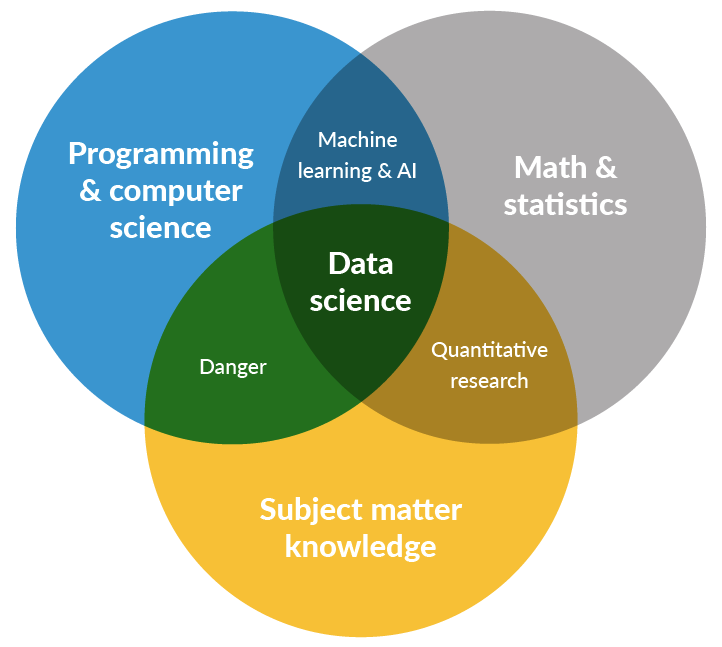

## clustering methods overview 

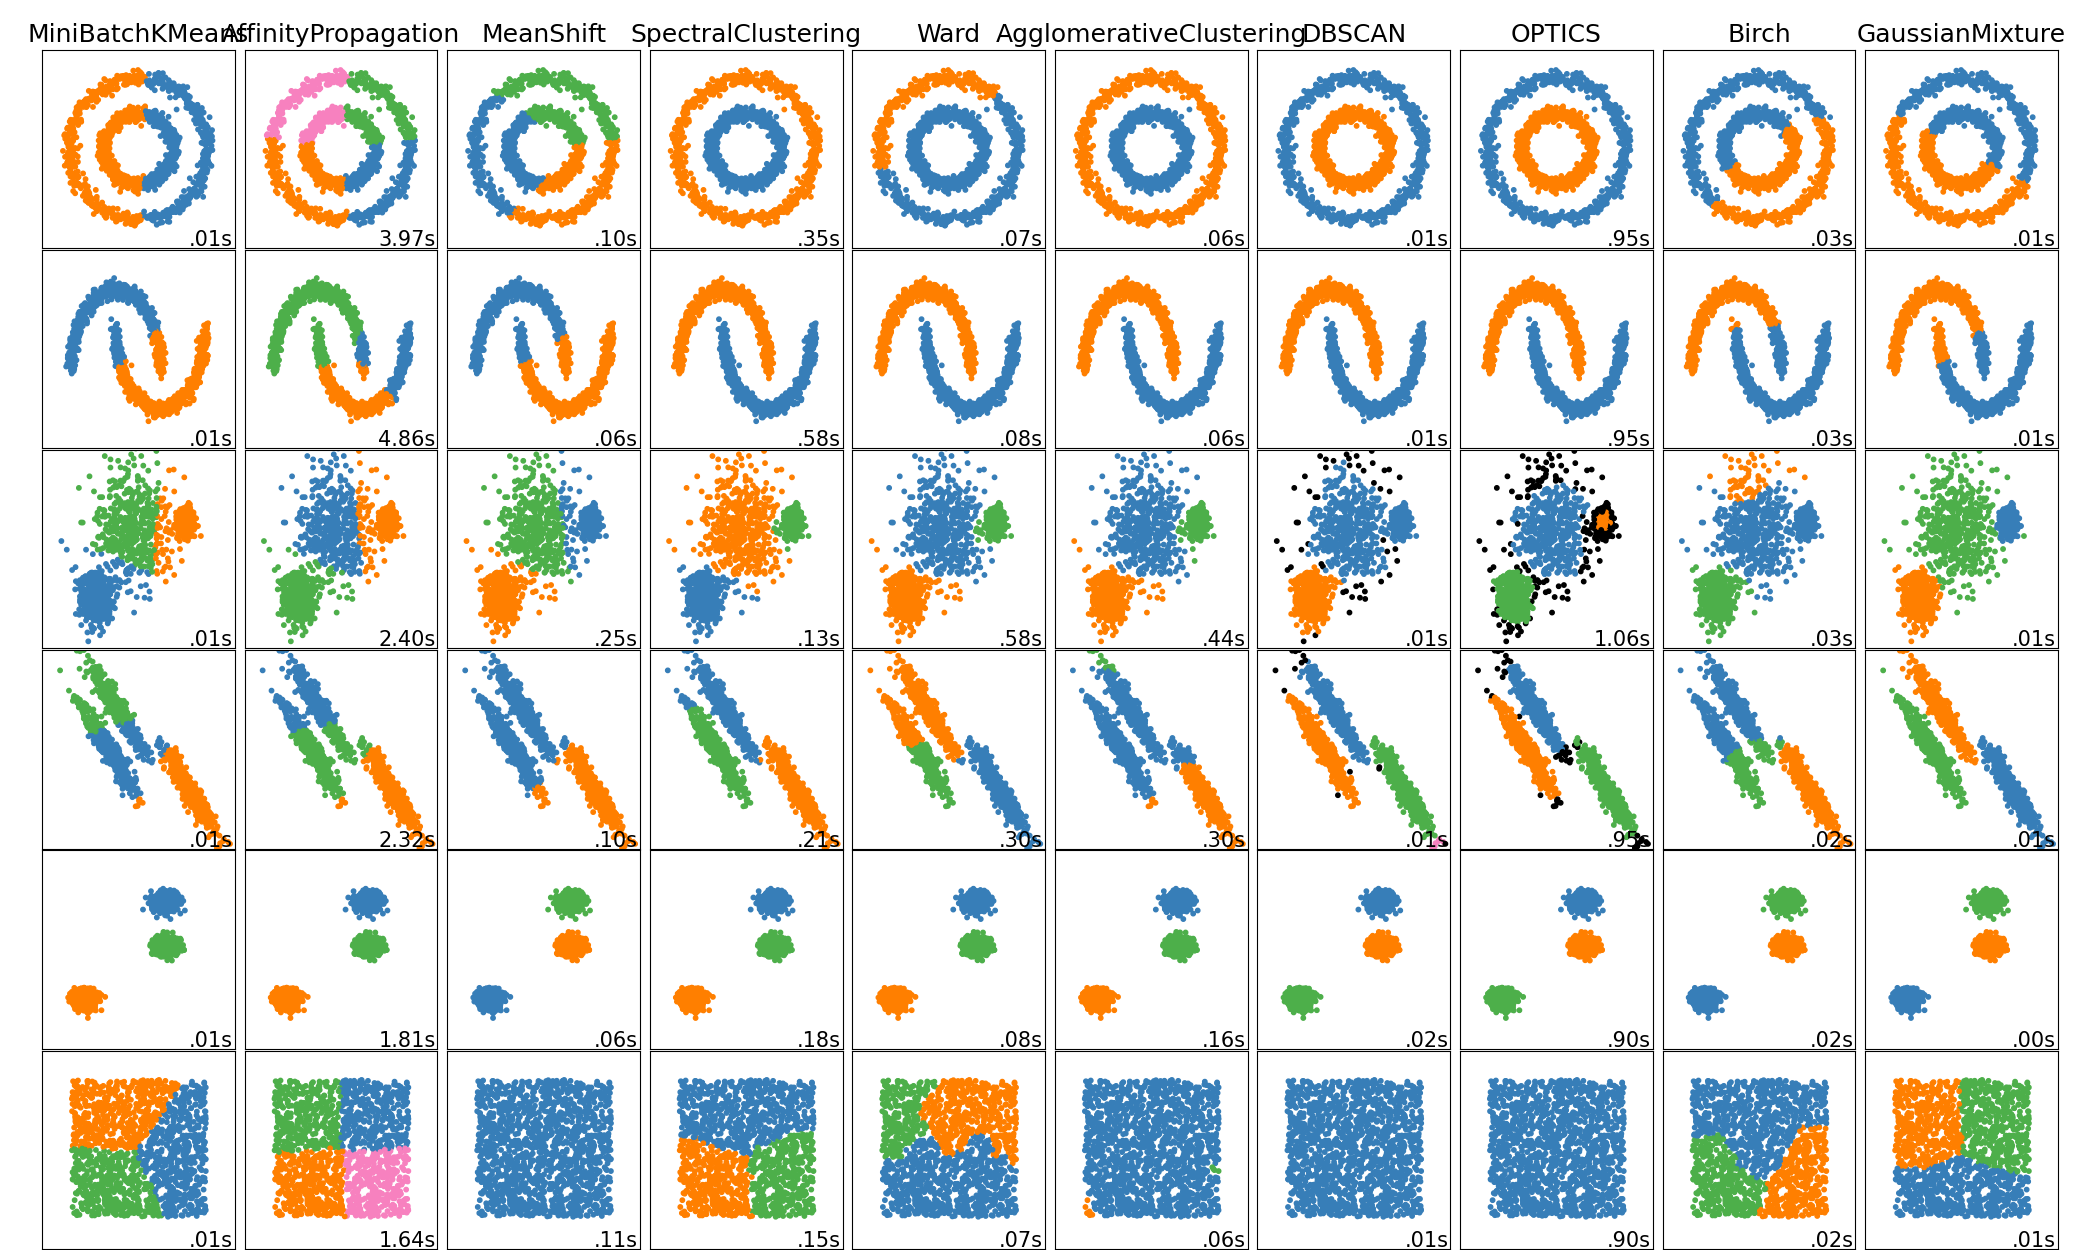


(1)K-Means
(2)Mini-Batch K-Means
(3)Affinity Propagation
(4)Mean Shift
(5)Spectral Clustering
(6)Ward
(7)Agglomerative Clustering
(8)DBSCAN
(9)BIRCH
(10)OPTICS
(11)Mixture of Gaussians
(12)HDBSCAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time

%matplotlib inline

plot_kwds = {"alpha":0.25,"s":80,"linewidth":0} # Define the plot keywords

In [2]:
data = np.load("Lesson33-clusterable_data.npy")
#An NPY file is a NumPy array file created by the Python software package with the NumPy library installed. ... 
#NumPy is a Python programming language library that provides support for large arrays and matrices. 
#You can export an array to an NPY file by using np. save('filename. npy', array)

data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]], shape=(2309, 2))

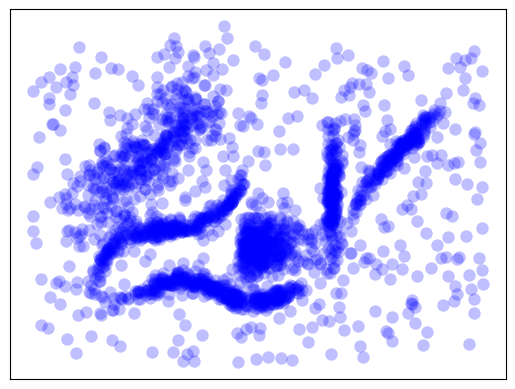

In [3]:
plt.scatter(data[:,0],data[:,1],c="b",**plot_kwds)

#plt.scatter(data.T[0], data.T[1], c='b')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# (1) KMeans - Centroid models

KMeans(n_clusters=6) clusters:  [0 1 2 3 4 5]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)]

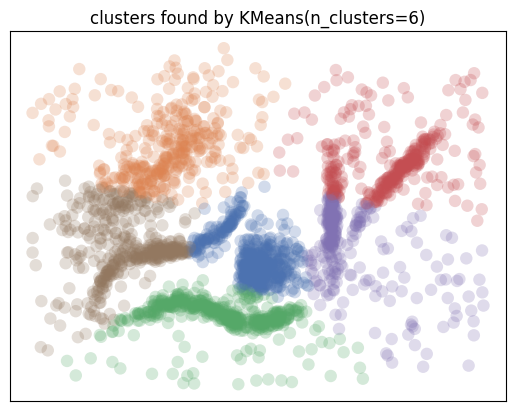

In [4]:
import numpy as np
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (2) Mini_Batch KMeans - Centroid models

MiniBatchKMeans(n_clusters=6) clusters:  [0 1 2 3 4 5]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)]

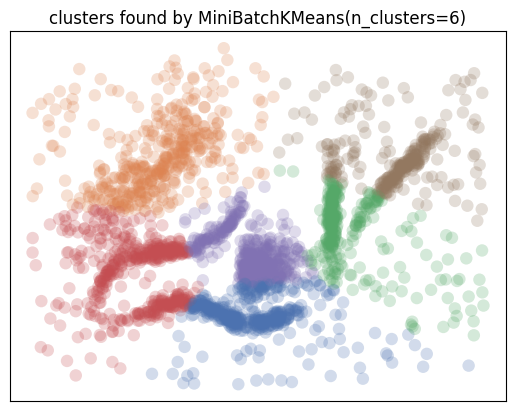

In [5]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=6)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (3) AffinityPropagation (Hierarchical) - Connectivity models

AffinityPropagation(damping=0.95) clusters:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)]

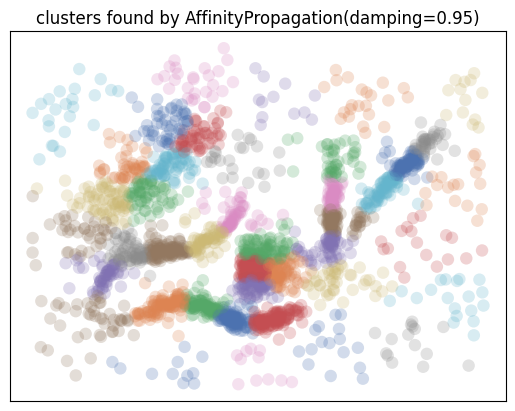

In [6]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping = 0.95)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (4) Mean Shift = Centroid models

MeanShift(bandwidth=0.175, cluster_all=False) clusters:  [-1  0  1  2  3  4]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)]

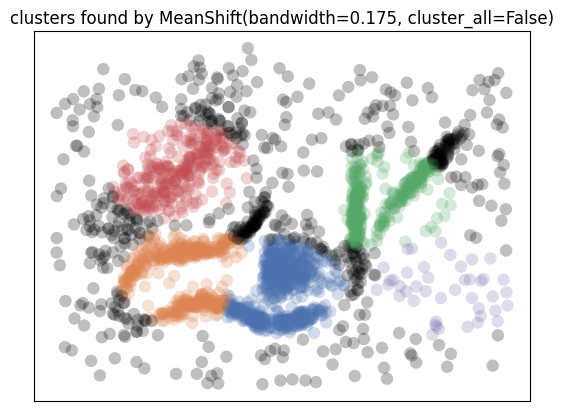

In [7]:
from sklearn.cluster import MeanShift

model = MeanShift(bandwidth=0.175, cluster_all=False)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (5) Spectral Clustering - Connectivity models

SpectralClustering(n_clusters=6) clusters:  [0 1 2 3 4 5]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)]

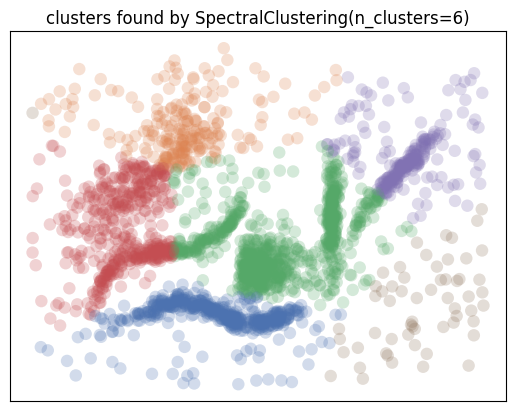

In [8]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=6)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (6) Ward(Hierarchical) - Connectivity models

# (7) Agglomerative Clustering (Hierarchical) - Connectivity models

AgglomerativeClustering(n_clusters=6) clusters:  [0 1 2 3 4 5]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)]

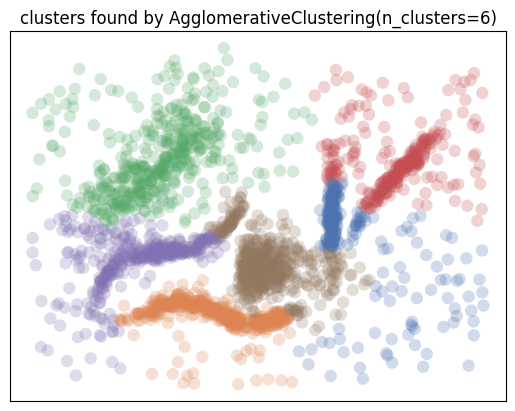

In [9]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=6,linkage='ward') #linkage : {'ward', 'complete', 'average', 'single'}


yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (8) DBSCAN - Density models

DBSCAN(eps=0.025) clusters:  [-1  0  1  2  3  4  5  6  7]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373)]

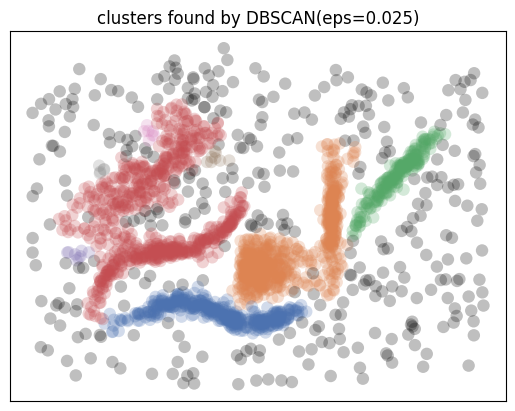

In [10]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.025)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (9) BIRCH - Connectivity models

Birch(n_clusters=6, threshold=0.01) clusters:  [0 1 2 3 4 5]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)]

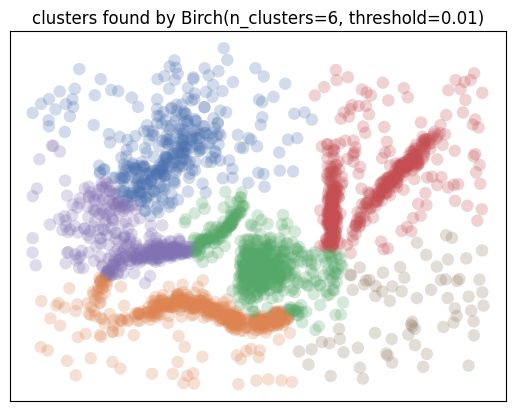

In [11]:
from sklearn.cluster import Birch

model = Birch(threshold=0.01, n_clusters=6)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (10) OPTICS - Density model

OPTICS(min_samples=15) clusters:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)]

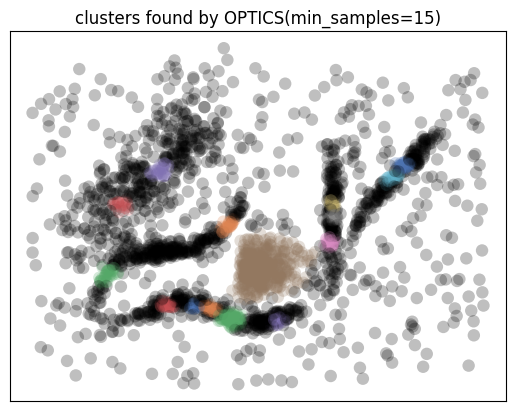

In [12]:
from sklearn.cluster import OPTICS
model = OPTICS(min_samples=15)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (11) Gaussian Mixture - Distribution models

GaussianMixture(n_components=6) clusters:  [0 1 2 3 4 5]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)]

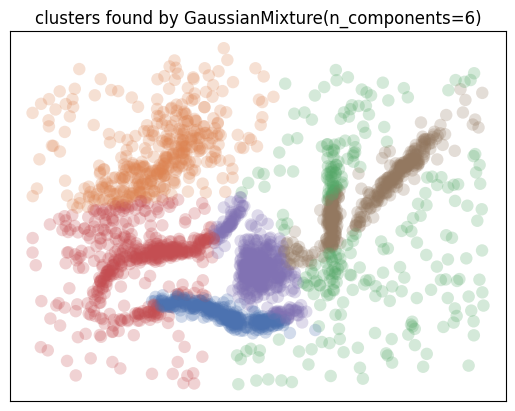

In [13]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=6)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# (12) HDBSCAN - Density models 

HDBSCAN(min_cluster_size=15) clusters:  [-1  0  1  2  3  4  5]


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)]

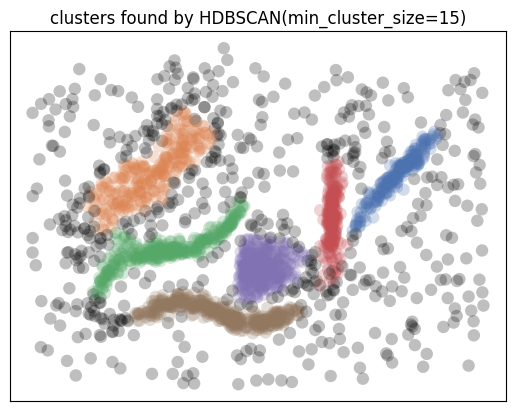

In [14]:
import hdbscan

model = hdbscan.HDBSCAN(min_cluster_size=15)

yhat = model.fit_predict(data)

clusters = np.unique(yhat)

palette = sns.color_palette("deep",np.unique(yhat).max()+1)

colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]

plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("clusters found by %s" %model)


print("{} clusters: ".format(model), clusters)

palette

# In Summary

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.mixture as mixture
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

#conda install -c conda-forge hdbscan
import hdbscan

Text(0.5, 1.0, 'orignal data plot')

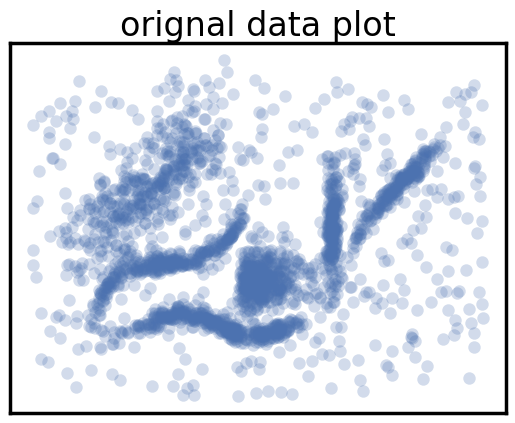

In [16]:
data = np.load('Lesson33-clusterable_data.npy')
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title("orignal data plot")

## to simply the methods-calling and plotting, define a function

In [17]:
## to simply the methods-calling and plotting, def a function

def plot_clusters(data,algorithm,args,kwargs):
    start_time = time.time()
    labels = algorithm(*args,**kwargs).fit_predict(data)
    end_time=time.time()

    palette = sns.color_palette("deep",np.unique(labels).max()+1)

    colors = [palette[x] if x>=0 else[0,0,0] for x in yhat]
    
    plt.scatter(data.T[0],data.T[1],c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(0.8, 0.2, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=16)
    

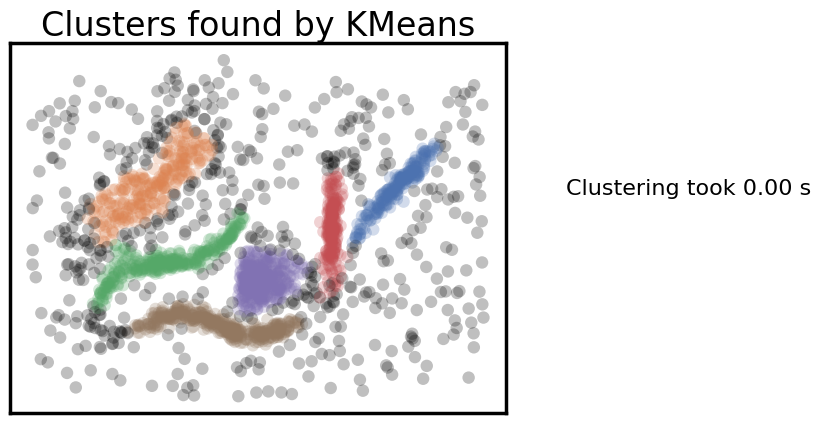

In [19]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

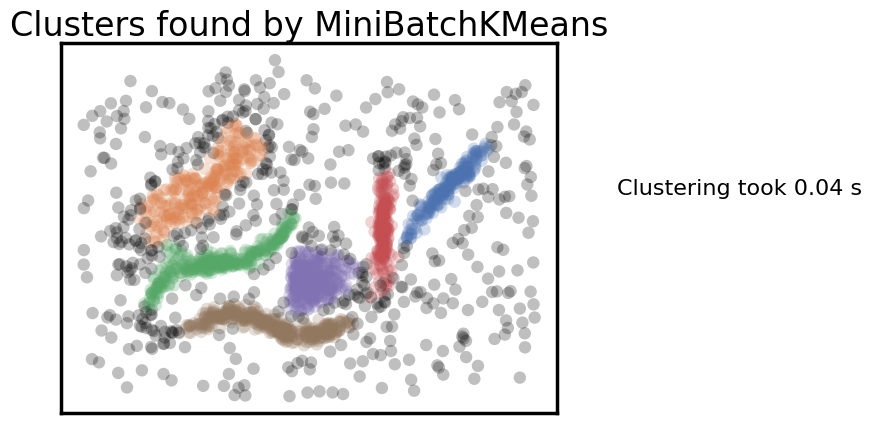

In [20]:
plot_clusters(data, cluster.MiniBatchKMeans, (), {'n_clusters':6})


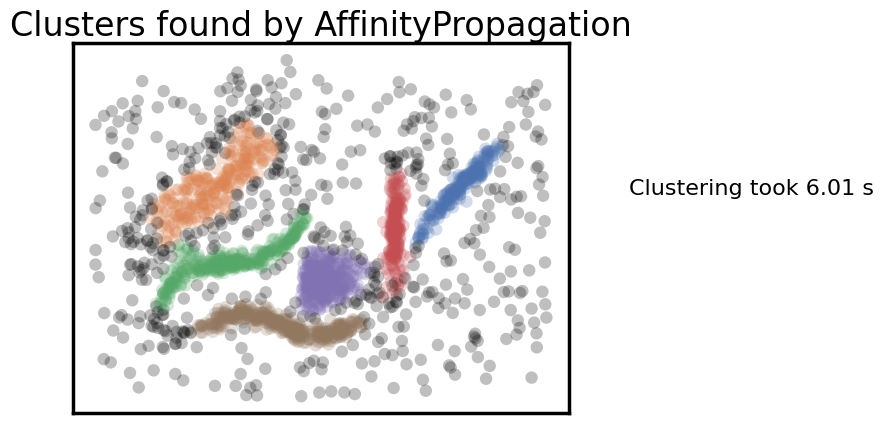

In [21]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping':0.95})


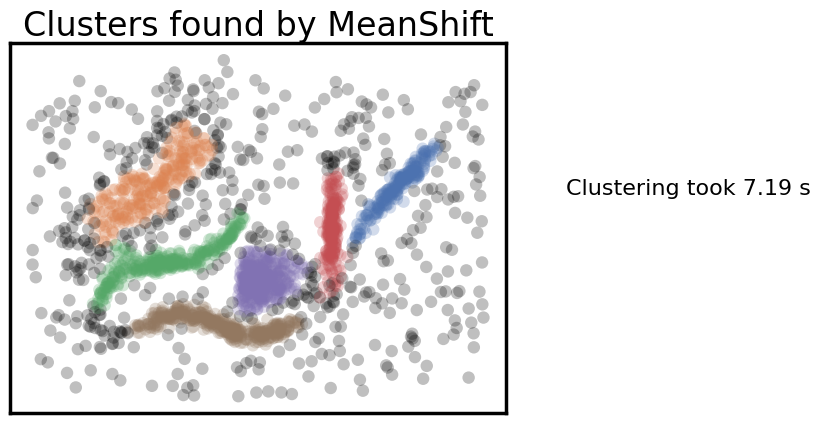

In [32]:
plot_clusters(data, cluster.MeanShift,(), {'bandwidth':0.05,'cluster_all':False})

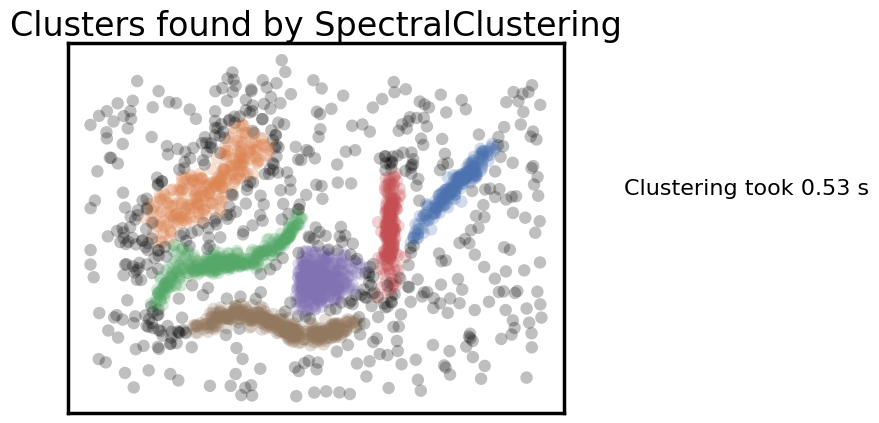

In [24]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

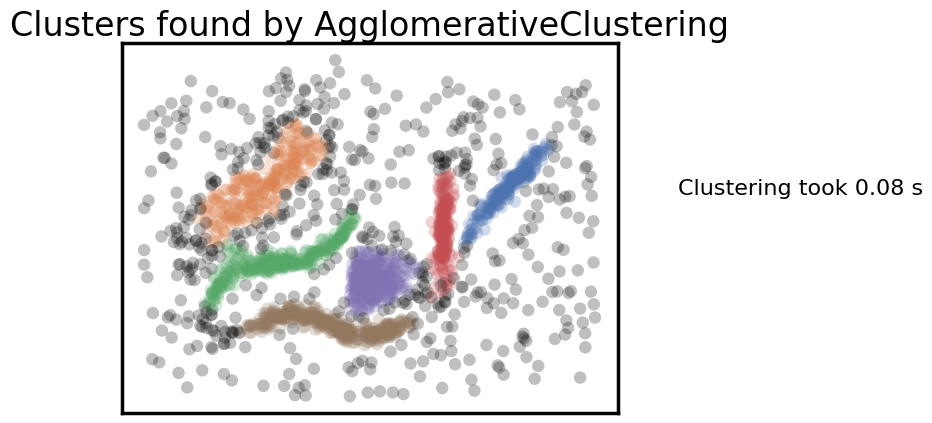

In [25]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

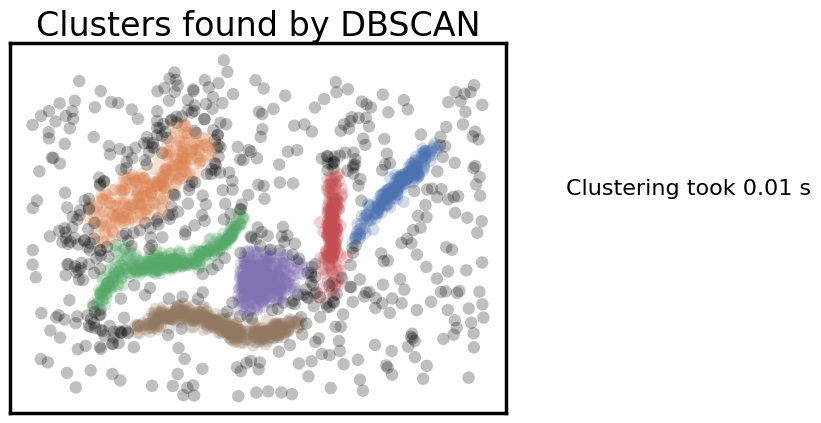

In [26]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

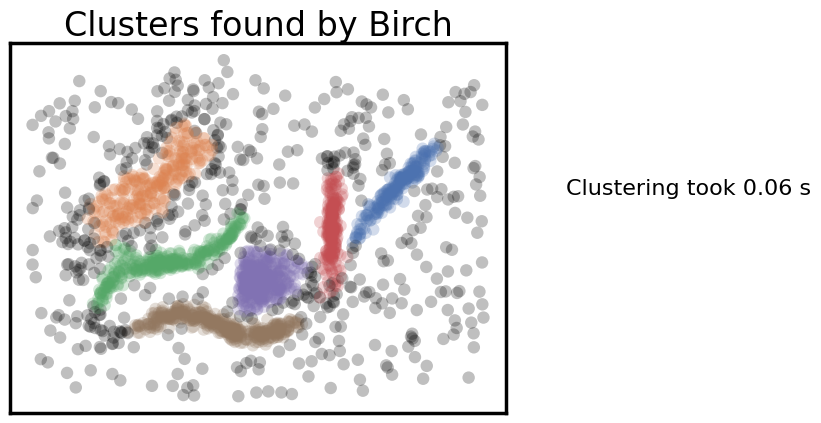

In [27]:
plot_clusters(data, cluster.Birch, (), {'threshold':0.01,'n_clusters':6})

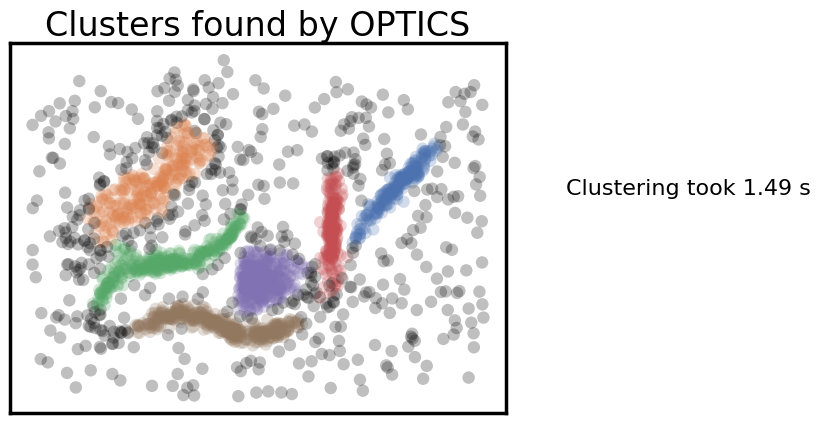

In [28]:
plot_clusters(data, cluster.OPTICS, (), {'min_samples':15})

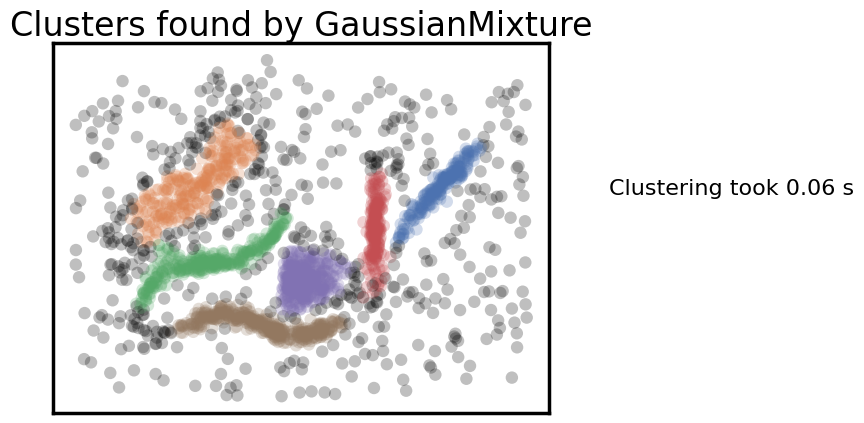

In [29]:
plot_clusters(data, mixture.GaussianMixture, (), {'n_components':6})

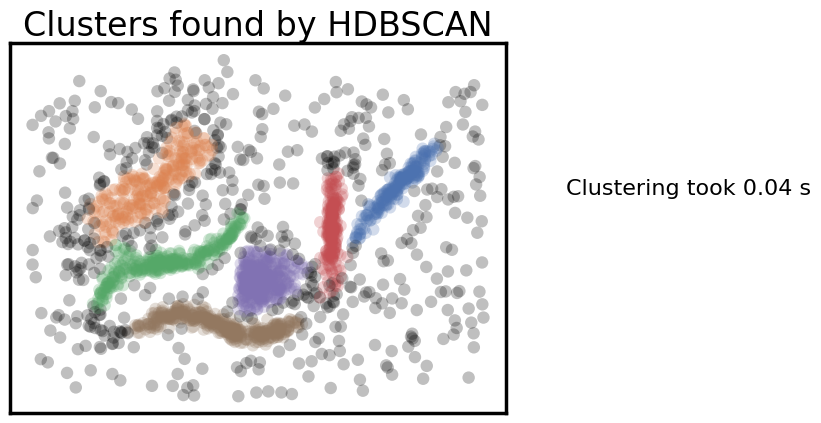

In [30]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

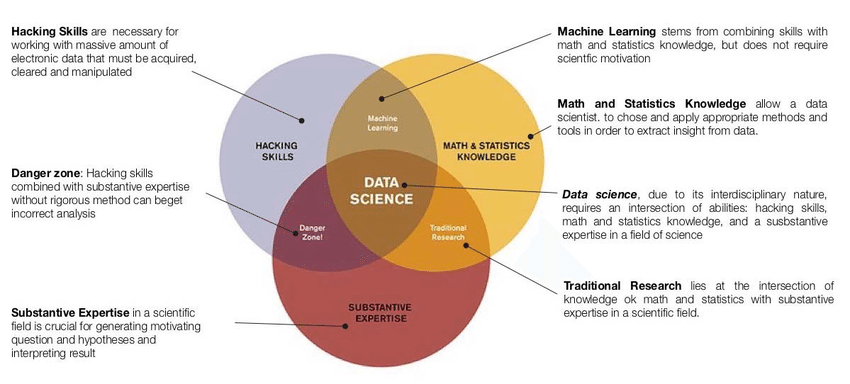